In [1]:
import tensorflow.keras as keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Input, Activation, add, Add, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.regularizers import l2

from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

from IPython.display import SVG
from tensorflow.python.keras.utils.vis_utils import model_to_dot
from tensorflow.keras.preprocessing.image import ImageDataGenerator

random_state = 42

In [2]:
# データの読み込み

df = pd.read_csv('input/train.csv')
df_test = pd.read_csv('input/test.csv')

In [3]:
print(type(df), df.shape)
print(type(df_test), df_test.shape)

<class 'pandas.core.frame.DataFrame'> (42000, 785)
<class 'pandas.core.frame.DataFrame'> (28000, 784)


In [4]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
X_train = df.loc[:, df.columns != 'label']
y_train = df['label']

In [7]:
X_train = X_train.to_numpy()  # or X_train.values
y_train = y_train.to_numpy()

In [8]:
print(type(X_train))
print(type(y_train))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [9]:
X_train = X_train / 255
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))

print(X_train.shape)

(42000, 28, 28, 1)


In [10]:
# 層間の出力サイズ計算用

def oh(h, p, fh, s):
    OH = (h + 2*p - fh)/s +1
    return OH

def ow(w, p, fw, s):
    OW = (w + 2*p - fw)/s + 1

In [11]:
# モデル実装

model = Sequential()
model.add(Conv2D(16, kernel_size=(5, 5), padding= 'same', activation='relu',
                kernel_initializer='he_normal', input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(5, 5), padding='same', activation='relu',
                kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(5, 5), padding='same', activation='relu',
                 kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2, 2))

model.add(GlobalAveragePooling2D())
model.add(Dropout(0.2))

model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss=keras.losses.sparse_categorical_crossentropy,
             optimizer='adam',
             metrics=['accuracy'])

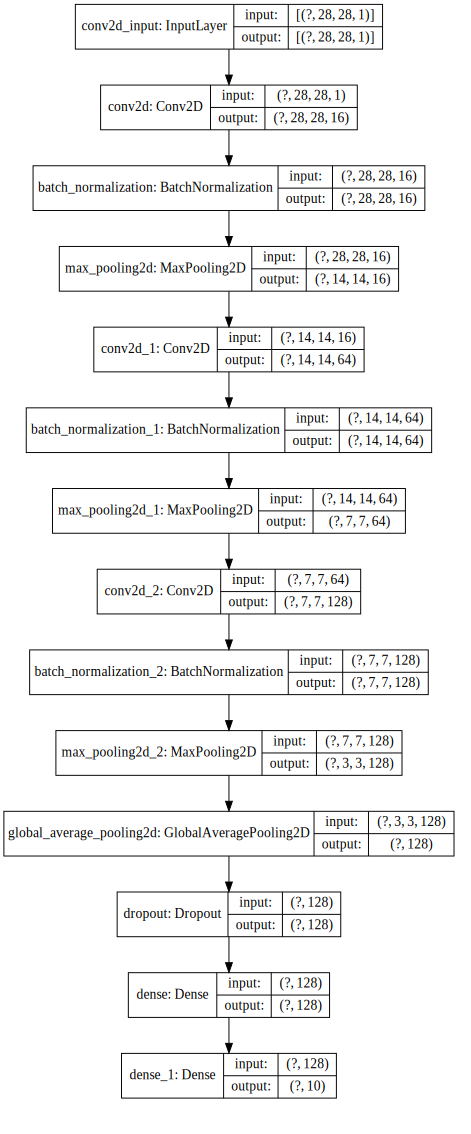

In [12]:
SVG(model_to_dot(model, show_layer_names=True, show_shapes=True, dpi=70).create(prog='dot', format='svg'))

In [ ]:
early_stopping = EarlyStopping(patience=1, verbose=1)
history = model.fit(X_train, y_train,
                    batch_size=128, epochs=20, verbose=1, callbacks=[early_stopping])

Train on 42000 samples
Epoch 1/20
28928/42000 [===================>..........] - ETA: 26s - loss: 0.2288 - accuracy: 0.9347

In [ ]:
resultlt = pd.DataFrame(history.history)
result.plot()

In [ ]:
# 推測
X_test = df_test.to_numpy()
X_test = X_test / 255
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

print(X_test.shape)

In [ ]:
y_pred = model.predict(X_test)
y_pred = np.asarray([np.argmax(pred) for pred in y_pred])

print(y_pred.shape)

In [ ]:
# 提出

df_pred = pd.Series(y_pred)

submission = pd.read_csv('input/sample_submission.csv')
submission['Label'] = df_pred

submission.to_csv('input/your_submission.csv', index=False)